# SPRING 2021
# Applied Machine Learning, HW 10 Solutions

<b><font color='red'>Instructions:</font></b>  Read all problems very carefully. Make sure that you are answering all questions included in a given problem. For every question, you are provided with a code cell to show your solution; be sure to run the cell by pressing the SHIFT and ENTER buttons simultaneously. The output of the cell must demonstrate the correctness of your solution. If you need to insert more code cells -- feel free to do so.

**Problem 1** 

1. In this problem, you will be working with the [SMS Spam Collection Data Set](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection). First, run the code cell below to load the data.  

In [ ]:
import pandas as pd

link='https://raw.githubusercontent.com/graf10a/Applied-Machine-Learning-Course/main/Data/spam.csv'
spam=pd.read_csv(link, encoding = "ISO-8859-1")[['v1', 'v2']]
spam.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


  2. As can be seen from the output of the `spam.head()` function above, this data set contains a collection of "spam" and "ham" SMS messages. To build a successful classifier on this data we will need to convert the SMS messages into a numerical form. 

    But first, 
    * print to the screen the shape of the data set;
    * demonstrate that there are no missing values.

In [ ]:
spam.shape

(5572, 2)

In [ ]:
spam.isna().sum().sum()

0

3. Convert the SMS messages from the `'v2'` column of the data frame into a numerical form using TF-IDF vectorization. Save the result as `X`.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec=TfidfVectorizer()
X=vec.fit_transform(spam['v2'])

4. Demonstrate that `X` has a type of `scipy.sparse.csr.csr_matrix`.

In [ ]:
type(X)

scipy.sparse.csr.csr_matrix

5. What is the shape of `X`?

In [ ]:
X.shape

(5572, 8672)

  6. Wow! This matrix has so many columns (or features)! Turn the matrix into a data frame (see how we did it in class) and print to the screen the first 6 rows of the first 6 columns of the data frame.

In [ ]:
pd.DataFrame(X[:6, :6].toarray(), columns=vec.get_feature_names()[:6])

,00,000,000pes,008704050406,0089,0121
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0


7. Demonstrate that the `'v1'` column contains only the `'spam'` and `'ham'` entries and nothing else.

In [ ]:
spam['v1'].unique()

array(['ham', 'spam'], dtype=object)

8. Convert the `'v1'` column of `spam` into a binary target whose entries are either 0's or 1's and save the result in a new `spam` column called `v1_int`.

In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
spam['v1_int']=le.fit_transform(spam['v1'])

9. Print the first 10 rows of `'v1'` and `'v1_int'` columns of `spam` side-by-side and visually inspect the result making sure that it looks reasonable.

In [ ]:
spam[['v1', 'v1_int']].head(10)

,v1,v1_int
0,ham,0
1,ham,0
2,spam,1
3,ham,0
4,ham,0
5,spam,1
6,ham,0
7,ham,0
8,spam,1
9,spam,1


10. Use a standard function of the Pandas library to print to the screen a short summary showing the numbers of ones and zeros in the target column `'v1_int'` (the counts of unique values).

In [ ]:
spam['v1_int'].value_counts()

0    4825
1     747
Name: v1_int, dtype: int64

11. You shoud see the "ham" messages dominate this data frame. Compute the percentage of the "spam" messages and print the result to the screen.

In [ ]:
spam['v1_int'].mean()*100

13.406317300789663

12. To get an idea about how this data can be used in a machine learning model and about the performance achievable by such a model, instantiate a logistic regression object (do not fit it). Also, save the content of the `'v1_int'` column as a NumPy array called `y`.

In [ ]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()

y=spam['v1_int'].values

13. Compute the avearge across folds 5-fold cross-validated accuracy score on the `X` and `y` data for the logistic regression classifier introduced in the previous step; print the result to the screen.

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(lr, X, y, cv=5, scoring='accuracy').mean()

0.9610549790276224

14. Repeat step 12 replacing accuracy with recall.

In [ ]:
cross_val_score(lr, X, y, cv=5, scoring='recall').mean()

0.7161700223713646

15. Repeat step 12 replacing accuracy with precision.

In [ ]:
cross_val_score(lr, X, y, cv=5, scoring='precision').mean()

0.9909303360957283

16. Repeat step 12 replacing accuracy with F1 score.

In [ ]:
cross_val_score(lr, X, y, cv=5, scoring='f1').mean()

0.8312612807417048

17. Instantiate a KNN classifier; do not specify the value of the $K$-parameter.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()

18. Use the `X` and `y` data to perform a 5-fold cross-validated grid search for the best value of $K$ to be used with the classifier introduced in the previous step. "Best" in the case means that it must maximize the F1 score. Limit your search to the values of $K$ in the range from 1 to 50 (it might take a couple of minutes for the grid search to finish, so please be patient).

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV

gs=GridSearchCV(knn, cv=5, scoring='f1', 
                param_grid = {'n_neighbors': np.arange(1, 51)})
gs.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

19. Print to the screen the best number of nearest neighbors found in the preious step.

In [ ]:
gs.best_params_

{'n_neighbors': 19}

20. A lot of information about the results of the grid search process can be found in the `cv_results_` attribue of the grid search object created in step 18. It is a dictionary that can be easily converted to a Pandas data frame by passing it as an argument to the `pd.DataFrame()` function. Try it! Create a new data frame `cv_res` holding the grid search results.

In [ ]:
cv_res=pd.DataFrame(gs.cv_results_)

21. Print to the screen the first five rows of `cv_res` and visually inspect the result. 

In [ ]:
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002247,0.000513,0.145298,0.013206,1,{'n_neighbors': 1},0.755187,0.739496,0.731915,0.763485,0.731915,0.744400,0.012778,43
1,0.001887,0.000111,0.147621,0.007251,2,{'n_neighbors': 2},0.604651,0.571429,0.580952,0.600939,0.594340,0.590462,0.012481,45
2,0.001857,0.000068,0.156148,0.009558,3,{'n_neighbors': 3},0.604651,0.571429,0.580952,0.600939,0.594340,0.590462,0.012481,45
3,0.001815,0.000103,0.181627,0.001777,4,{'n_neighbors': 4},0.484848,0.469388,0.463918,0.447917,0.471795,0.467573,0.011994,50
4,0.001765,0.000033,0.182618,0.002013,5,{'n_neighbors': 5},0.484848,0.469388,0.463918,0.822134,0.826772,0.613412,0.172457,44


22. Use the data frame to determine the mean test score computed for the best value of $K$ found in item 19. Save the result as `best_score` and print it to the screen. The result must be a pure number -- it must not be a NumPy array or a Pandas series. The resulting F1 score can be compared with the F1 score obtained with the logistic regression classifier in item 16.

  *Hint:* create a boolean mask to select the instance with the best $K$ in the `param_n_neighbors` column; then apply this mask to the `mean_test_score` column -- the result must be a Pandas series with a single entry. Then extract the numerical values of the entry by making use of the `values` attribute and NumPy indexing.

In [ ]:
mask_best_K=cv_res['param_n_neighbors'].values==gs.best_params_['n_neighbors']
best_score=cv_res.loc[mask_best_K, 'mean_test_score'].values[0]
best_score

0.8352820427537877

23. As you see there is a lot information available in `cv_res`. Every row of this data frame contains information about the grid search for some specific value of $K$ shown in the `'param_n_neighbors'` column. Another interesting column is called `'mean_test_score'` and it shows the average across all folds of the metric used in the grid search process (F1 score, in this example). Now, 
  * plot this average score versus the number of nearest neighbors;
  * add a vertical line (red, dashed) to the graph marking the location of the best $K$ found by the grid search;
  * for this red vertrical line create a legend showing the value of $K$ it represents and the corresponding F1 score; 
  * label the axes.

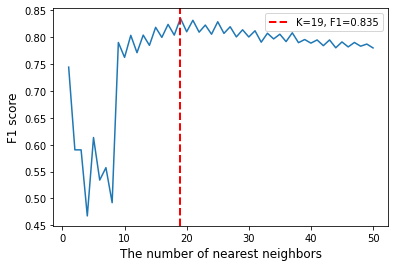

In [ ]:
import matplotlib.pyplot as plt

label=f"K={gs.best_params_['n_neighbors']}, F1={best_score:.3f}"

plt.plot(cv_res['param_n_neighbors'].values, 
         cv_res['mean_test_score'].values)
plt.axvline(gs.best_params_['n_neighbors'], color='red', 
            ls='--', linewidth=2, 
            label=label,)
plt.xlabel("The number of nearest neighbors", 
           fontsize=12)
plt.ylabel("F1 score", fontsize=12)
plt.legend()
plt.show()

**Problem 2**

1. Run the code cell below to load the [Car Evaluation Data Set](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation).

In [ ]:
link='https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'target']
auto=pd.read_csv(link, names=cols)

2. The code in item 1 creates a new data frame `auto`. Print to the screen the first five rows of the data frame.

In [ ]:
auto.head()

,buying,maint,doors,persons,lug_boot,safety,target
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


The data frame include seven columns:

* *target:* car acceptability
* *buying:* buying price
* *maint:* price of the maintenance
* *doors:* number of doors
* *persons:* capacity in terms of persons to carry
* *lug_boot:* the size of luggage boot
* *safety:* estimated safety of the car

3. Print to the screen a summary showing the column name, the number of non-null values, and the data type for each column of `auto`. 

In [ ]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   target    1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


4. For each column of the data frame print to the screen a summary showing counts of unique values. If you decide to created these summaries in a column-by-column fashion then use different code cells for each columns. Alternatively, you can create a simple for-loop and iterrate over the column names printing the name of the current column followed by the summary for this column (don't forget to use the print() statement in order for the result to be printed to the screen in Colab). 

In [ ]:
for c in auto.columns:
  print(f"Column {c}:")
  print(auto[c].value_counts())

Column buying:
med      432
vhigh    432
high     432
low      432
Name: buying, dtype: int64
Column maint:
med      432
vhigh    432
high     432
low      432
Name: maint, dtype: int64
Column doors:
5more    432
2        432
4        432
3        432
Name: doors, dtype: int64
Column persons:
2       576
4       576
more    576
Name: persons, dtype: int64
Column lug_boot:
med      576
small    576
big      576
Name: lug_boot, dtype: int64
Column safety:
med     576
high    576
low     576
Name: safety, dtype: int64
Column target:
unacc    1210
acc       384
good       69
vgood      65
Name: target, dtype: int64


5. In the previous step, you saw that all columns in the data frame are categorical. To build a classifier on these data, we need to convert the categorical columns into a numerical form. Let's start with the `'target'` column: use an approriate Scikit-Learn class to convert it to a numerical form. Save the resulting NumPy array as `y`.

In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
y=le.fit_transform(auto['target'].values)

6. Print to the screen the unique values of `y` and check if the result makes sense.

In [ ]:
np.unique(y)

array([0, 1, 2, 3])

7. Build a 2-step pipeline processing differently two sets of columns: the first set includes the columns `['doors', 'persons']` -- we will assume that for values present in this columns there is an intrinsic sense of order, so we will encode them accordingly. The remaining feature columns `['buying', 'maint', 'lug_boot', 'safety']` must be one-hot encoded. 

  So, in the first step of the pipeline, the data must be encoded according to the specification exaplained above. The second step of the pipeline is a Softmax regression with the `max_iter` parameter set to 500 (to ensure convergence).

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

ct=ColumnTransformer([
                      ('set1', OrdinalEncoder(), [2, 3]), 
                      ('set2', OneHotEncoder(dtype=np.uint8), [0, 1, 4, 5])
                      ])

pipe=Pipeline([
               ('enc', ct), 
               ('lr', LogisticRegression(max_iter=500))
               ])

8. Create a 70-30 split of the data into a training and testing set; as usual, startify on the target and set `random_state=42`.

In [ ]:
from sklearn.model_selection import train_test_split

X=auto.iloc[:, :-1].values
y=auto.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

9. Train the pipeline on the training data and make predictions on the test data.

In [ ]:
pipe.fit(X_train, y_train)
y_pred=pipe.predict(X_test)

10. Using the predicted values computed in the previous step, create a classification report for the classifier.

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.68      0.60      0.64       115
        good       0.82      0.43      0.56        21
       unacc       0.89      0.94      0.92       363
       vgood       0.82      0.90      0.86        20

    accuracy                           0.84       519
   macro avg       0.80      0.72      0.74       519
weighted avg       0.84      0.84      0.84       519

